In [5]:
import pickle
import numpy as np
with open('/home/hendrik/Documents/master_project/LokalData/server/baselines/Baselines_Stats_GAIL/PPO_GAIL_pickplace_lr_0.0001_demonstrations_14_id_0/learner_stats_gail', 'rb') as f:
    x = pickle.load(f)

In [4]:
path = '/home/hendrik/Documents/master_project/LokalData/server/Stats for MA/pickplace 14/AC/pickplacedemonstrations: 14, training_episodes: 10, min critic: 5e-05, id: '
add = '/stats'

In [6]:
def parse_AC_data(path, add, num_exp):
    result_dict = {}
    dicts = []
    for i in range(num_exp):
        com_path = path + str(i) + add
        with open(com_path, 'rb') as f:
            dicts.append(pickle.load(f))
    for dict in dicts:
        for key in dict:
            next_entrance = dict[key].reshape([1, -1])
            if key in result_dict:
                result_dict[key] = np.append(result_dict[key], next_entrance, axis=0)
            else:
                result_dict[key] = next_entrance
    return result_dict

In [7]:
path_baseline = '/home/hendrik/Documents/master_project/LokalData/server/Stats for MA/pickplace 14/PPO GAIL/PPO_GAIL_pickplace_lr_0.0001_demonstrations_14_id_' 
add_baseline = '/learner_stats_gail'

In [8]:
result_dict_baseline = parse_AC_data(path=path_baseline, add = add_baseline, num_exp=5)

In [9]:
result_dict = parse_AC_data(path=path, add = add, num_exp=5)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_experiment_data(n_series, timesteps, plot_name):
    # create figure and axis objects
    fig, ax = plt.subplots()

    # calculate mean and standard deviation of each time step
    mean_data = np.mean(n_series, axis=0)
    std_data = np.std(n_series, axis=0)

    # plot mean data as a line and shade area between ±1 standard deviation
    ax.plot(timesteps, mean_data, '-o', markersize=5, label='Mean')
    ax.fill_between(timesteps, mean_data-std_data, mean_data+std_data, alpha=0.3, label='±1 Std Dev')

    # add labels, title, and legend to the plot
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Measurement Value')
    ax.set_title(plot_name)
    ax.legend()

    # display the plot
    plt.show()


In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_experiment_data(timesteps, experiments, names, plot_name):
    # create figure and axis objects
    fig, ax = plt.subplots()

    # loop over experiments
    for i, experiment in enumerate(experiments):
        # calculate mean and standard deviation of each time step for this experiment
        mean_data = np.mean(experiment, axis=0)
        std_data = np.std(experiment, axis=0)

        # plot mean data as a line and shade area between ±1 standard deviation
        ax.plot(timesteps[i], mean_data, '-o', markersize=5, label=names[i])
        ax.fill_between(timesteps[i], mean_data-std_data, mean_data+std_data, alpha=0.3)

    # add labels, title, and legend to the plot
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Measurement Value')
    ax.set_title(plot_name)
    ax.legend()

    # display the plot
    plt.show


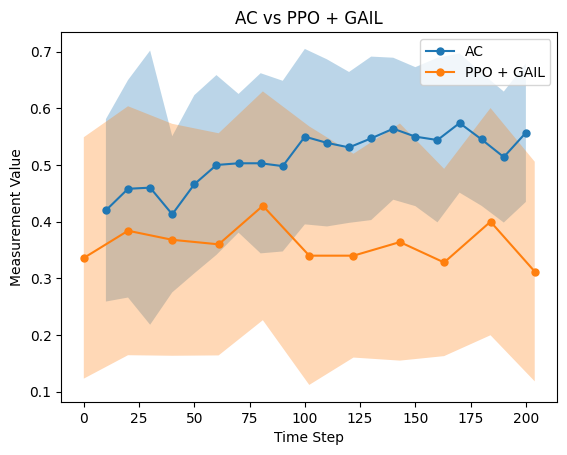

In [12]:
plot_experiment_data(
    timesteps=[result_dict['step'][0], result_dict_baseline['step'][0]], 
    experiments=[result_dict['success_rate'], 
                 result_dict_baseline['success_rate']],
    names=['AC', 'PPO + GAIL'],
    plot_name='AC vs PPO + GAIL'
    )